# Offline Evaluation Metrics Visualizations
This notebook visualizes user-specific performance metrics of various recommenders in the mind-subset dataset to assess effectiveness and ranking overlap. We explore two metric groups:
1. **Effectiveness Metrics**: We use ranking-based metrics, Normalized Discounted Cumulative Gain (NDCG) and Reciprocal Rank (RR), to evaluate recommender effectiveness.
2. **Ranking Overlap Metrics**: We use Rank-Based Overlap (RBO) to assess consistency in top-k recommendations relative to final rankings.

## 1. Setup

### 1. 1 Importing Libraries

PyData packages:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Local code:

In [2]:
from IPython.display import HTML

from poprox_recommender.eval_tables import EvalTable

### 1. 2 Loading Data

In [ ]:
mind_subset_user_metrics = pd.read_csv("../outputs/mind-subset-profile-metrics.csv.gz")
mind_subset_user_metrics.head()

,Unnamed: 0,profile_id,recommender,personalized,NDCG@5,NDCG@10,RR,RBO@5,RBO@10
0,0,00523b6e-a6b7-5b79-be99-0c95035bd0f5,nrms,True,1.0,1.0,1.0,0.409510,0.651322
1,1,00523b6e-a6b7-5b79-be99-0c95035bd0f5,mmr,True,1.0,1.0,1.0,0.203347,0.351640
2,2,00523b6e-a6b7-5b79-be99-0c95035bd0f5,pfar,True,1.0,1.0,1.0,0.409510,0.651322
3,3,00523b6e-a6b7-5b79-be99-0c95035bd0f5,topic-cali,True,1.0,1.0,1.0,0.409510,0.651322
4,4,00523b6e-a6b7-5b79-be99-0c95035bd0f5,softmax,True,1.0,1.0,0.5,0.278163,0.508508


In [4]:
effectiveness_metrics = ["NDCG@5", "NDCG@10", "RR"]
overlap_metrics = ["RBO@5", "RBO@10"]

## 2. Results

### 2. 1 Effectiveness Metrics
NDCG measures how well the recommendations align with user test data, focusing on the top-k positions, such as the top 5 (NDCG@5) or top 10 (NDCG@10). Likewise, RR evaluates how well the recommender finds the most relevant item as the top result.

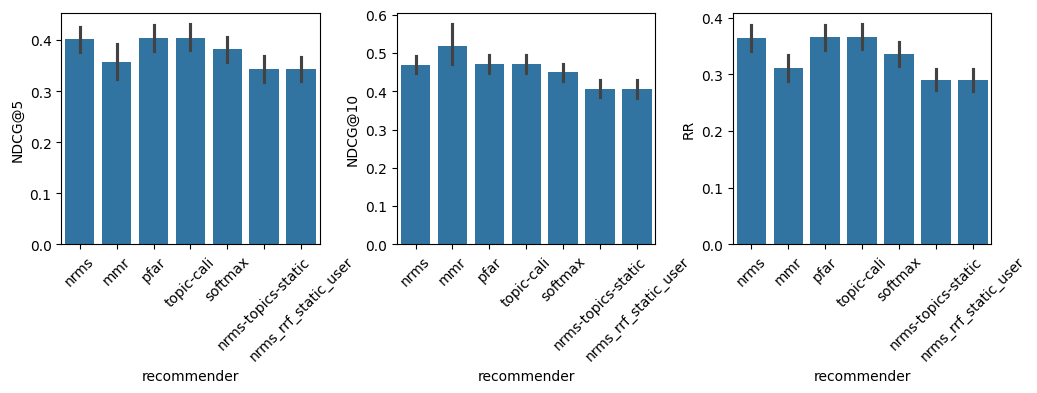

In [5]:
plt.figure(figsize=(12, 3))
plt.subplots_adjust(wspace=0.3)

for i, metric in enumerate(effectiveness_metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(data=mind_subset_user_metrics, x="recommender", y=metric)
    plt.xticks(rotation=45)

plt.show()

The summary tables show the mean values, standard deviation, and quantiles (10%ile, Median, 90%ile), each accompanied by their respective 95% confidence intervals for effectiveness metrics across recommenders.

In [6]:
for metric in effectiveness_metrics:
    tw = EvalTable(mind_subset_user_metrics, "recommender", metric)
    tw.add_stat("Mean", np.mean, ci=True)
    tw.add_stat("Std Dev", np.std, ci=True)
    tw.add_quantiles(["10%ile", "Median", "90%ile"], [0.1, 0.5, 0.9], ci=True)
    display(HTML(f"<h3>Summary Table for {metric}</h3>"))
    display(HTML(tw.html_table()))

"mmr 0.358(0.323,0.391)","0.554(0.510,0.601)","0.000(0.000,0.000)","0.000(0.000,0.000)","1.000(1.000,1.000)",
"nrms 0.403(0.378,0.429)","0.412(0.403,0.422)","0.000(0.000,0.000)","0.380(0.250,0.431)","1.000(1.000,1.000)",
"nrms-topics-static 0.343(0.318,0.367)","0.395(0.384,0.407)","0.000(0.000,0.000)","0.164(0.000,0.240)","1.000(1.000,1.000)",
"nrms_rrf_static_user 0.343(0.318,0.367)","0.395(0.384,0.407)","0.000(0.000,0.000)","0.164(0.000,0.240)","1.000(1.000,1.000)",
"pfar 0.405(0.379,0.430)","0.413(0.404,0.423)","0.000(0.000,0.000)","0.380(0.250,0.431)","1.000(1.000,1.000)",
"softmax 0.382(0.357,0.407)","0.406(0.396,0.416)","0.000(0.000,0.000)","0.250(0.196,0.380)","1.000(1.000,1.000)",
"topic-cali 0.405(0.379,0.431)","0.413(0.404,0.423)","0.000(0.000,0.000)","0.380(0.250,0.431)","1.000(1.000,1.000)",


"mmr 0.517(0.465,0.567)","0.825(0.734,0.919)","0.000(0.000,0.000)","0.333(0.315,0.356)","1.000(1.000,1.000)",
"nrms 0.469(0.447,0.492)","0.371(0.362,0.382)","0.000(0.000,0.000)","0.421(0.387,0.431)","1.000(1.000,1.000)",
"nrms-topics-static 0.406(0.384,0.429)","0.365(0.354,0.376)","0.000(0.000,0.000)","0.356(0.336,0.387)","1.000(1.000,1.000)",
"nrms_rrf_static_user 0.406(0.384,0.429)","0.365(0.355,0.376)","0.000(0.000,0.000)","0.356(0.335,0.387)","1.000(1.000,1.000)",
"pfar 0.471(0.448,0.493)","0.373(0.364,0.383)","0.000(0.000,0.000)","0.427(0.387,0.431)","1.000(1.000,1.000)",
"softmax 0.449(0.427,0.471)","0.368(0.358,0.378)","0.000(0.000,0.000)","0.387(0.367,0.431)","1.000(1.000,1.000)",
"topic-cali 0.471(0.447,0.494)","0.373(0.364,0.383)","0.000(0.000,0.000)","0.427(0.387,0.431)","1.000(1.000,1.000)",


"mmr 0.311(0.287,0.334)","0.379(0.365,0.393)","0.000(0.000,0.000)","0.143(0.143,0.167)","1.000(1.000,1.000)",
"nrms 0.364(0.342,0.387)","0.360(0.348,0.373)","0.000(0.000,0.000)","0.250(0.200,0.250)","1.000(1.000,1.000)",
"nrms-topics-static 0.290(0.269,0.310)","0.320(0.305,0.335)","0.000(0.000,0.000)","0.200(0.167,0.200)","1.000(1.000,1.000)",
"nrms_rrf_static_user 0.290(0.270,0.310)","0.320(0.305,0.335)","0.000(0.000,0.000)","0.200(0.167,0.200)","1.000(1.000,1.000)",
"pfar 0.365(0.343,0.388)","0.361(0.349,0.374)","0.000(0.000,0.000)","0.250(0.200,0.250)","1.000(1.000,1.000)",
"softmax 0.335(0.313,0.356)","0.345(0.332,0.359)","0.000(0.000,0.000)","0.200(0.200,0.250)","1.000(1.000,1.000)",
"topic-cali 0.365(0.342,0.388)","0.361(0.349,0.374)","0.000(0.000,0.000)","0.250(0.200,0.250)","1.000(1.000,1.000)",


### 2. 2 Ranking Overlap Metrics
RBO measures the similarity between two ranked lists, evaluating how much overlap exists between pure top-k recommendations and the actual rankings produced after recommendations. RBO can be applied at different list depths to analyze performance consistency, such as RBO@5 and RBO@10.

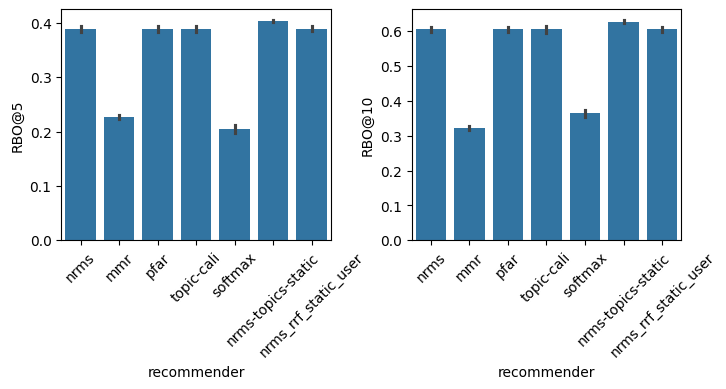

In [7]:
plt.figure(figsize=(8, 3))
plt.subplots_adjust(wspace=0.3)

for i, metric in enumerate(overlap_metrics, 1):
    plt.subplot(1, 2, i)
    sns.barplot(data=mind_subset_user_metrics, x="recommender", y=metric)
    plt.xticks(rotation=45)

plt.show()

The summary tables show the mean values, standard deviation, and quantiles (10%ile, Median, 90%ile), each accompanied by their respective 95% confidence intervals for ranking overlap metrics across recommenders.

In [8]:
for metric in overlap_metrics:
    tw = EvalTable(mind_subset_user_metrics, "recommender", metric)
    tw.add_stat("Mean", np.mean, ci=True)
    tw.add_stat("Std Dev", np.std, ci=True)
    tw.add_quantiles(["10%ile", "Median", "90%ile"], [0.1, 0.5, 0.9], ci=True)
    display(HTML(f"<h3>Summary Table for {metric}</h3>"))
    display(HTML(tw.html_table()))

"mmr 0.226(0.222,0.230)","0.060(0.055,0.065)","0.203(0.203,0.203)","0.203(0.203,0.216)","0.307(0.307,0.307)",
"nrms 0.389(0.384,0.394)","0.078(0.067,0.089)","0.396(0.307,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",
"nrms-topics-static 0.403(0.402,0.405)","0.024(0.021,0.027)","0.410(0.396,0.410)","0.410(0.410,0.410)","0.410(0.410,0.410)",
"nrms_rrf_static_user 0.389(0.384,0.394)","0.078(0.067,0.089)","0.396(0.307,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",
"pfar 0.389(0.384,0.394)","0.078(0.067,0.089)","0.396(0.307,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",
"softmax 0.205(0.198,0.212)","0.113(0.109,0.116)","0.044(0.031,0.058)","0.206(0.206,0.219)","0.351(0.346,0.365)",
"topic-cali 0.389(0.384,0.394)","0.078(0.067,0.090)","0.396(0.307,0.396)","0.410(0.410,0.410)","0.410(0.410,0.410)",


"mmr 0.321(0.315,0.328)","0.107(0.101,0.112)","0.235(0.235,0.235)","0.304(0.297,0.317)","0.453(0.453,0.469)",
"nrms 0.604(0.596,0.612)","0.133(0.119,0.149)","0.525(0.371,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
"nrms-topics-static 0.626(0.622,0.630)","0.068(0.062,0.076)","0.570(0.525,0.602)","0.651(0.651,0.651)","0.651(0.651,0.651)",
"nrms_rrf_static_user 0.604(0.596,0.612)","0.133(0.119,0.149)","0.525(0.371,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
"pfar 0.604(0.596,0.612)","0.133(0.118,0.150)","0.525(0.371,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
"softmax 0.365(0.355,0.374)","0.149(0.143,0.155)","0.158(0.135,0.181)","0.374(0.371,0.385)","0.547(0.538,0.561)",
"topic-cali 0.604(0.596,0.612)","0.133(0.118,0.150)","0.525(0.371,0.525)","0.651(0.651,0.651)","0.651(0.651,0.651)",
